In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

# Load your sequential data
file_path = "/home/ihsannh17/Downloads/RMP/github-repos/etc/2023-12-(04-14)_Label.csv"
data = pd.read_csv(file_path)

# Sort the data by time in descending order
# data = data.sort_values(by='Time (WIB)', ascending=False)

# Extract features and labels
features = data[['SpO2', 'BP Dia', 'BP Sys', 'HRV', 'Stress', 'HR', 'Body Temp']].values
labels = data['Code'].values
# Normalize features
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
# Create sequences for LSTM without filling missing values
sequence_length = 10  # You can adjust this based on your preference
X_sequence, y_sequence = [], []

for i in range(len(features_normalized) - sequence_length + 1):
    seq = features_normalized[i:i + sequence_length]
    # Skip sequences with NaN values
    # if np.isnan(seq).any():
    #     continue
    X_sequence.append(seq)
    y_sequence.append(labels_encoded[i + sequence_length - 1])

X_sequence = np.array(X_sequence)
y_sequence = np.array(y_sequence)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=np.nan, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy on Test Set: {accuracy}')

# Make predictions on part of the training data
# You can adjust the index range based on your preference
start_index = 0
end_index = 50
new_features_sequence = X_train[start_index:end_index]

# Predict the labels for the selected sequence
predicted_probs = model.predict(new_features_sequence)
predicted_labels = np.argmax(predicted_probs, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels)
print('Predicted Labels:', predicted_labels)
"""
"""

[0 0 0 ... 4 4 4]


"\nfor i in range(len(features_normalized) - sequence_length + 1):\n    seq = features_normalized[i:i + sequence_length]\n    # Skip sequences with NaN values\n    if np.isnan(seq).any():\n        continue\n    X_sequence.append(seq)\n    y_sequence.append(labels_encoded[i + sequence_length - 1])\n\nX_sequence = np.array(X_sequence)\ny_sequence = np.array(y_sequence)\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)\n\n# Split the training data into training and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)\n\n# Define the LSTM model\nmodel = Sequential()\nmodel.add(Masking(mask_value=np.nan, input_shape=(X_train.shape[1], X_train.shape[2])))\nmodel.add(LSTM(units=64))\nmodel.add(Dense(units=5, activation='softmax'))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentrop

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load your dataset
# Replace this with your data loading process
file_label  = "/home/ihsannh17/Downloads/RMP/github-repos/etc/2023-12-(04-14)_Label.csv"
df = pd.read_csv(file_label)

# Preprocess your data
# Replace this with your data preprocessing steps
X = df.drop(['Code', 'Time (WIB)', 'Name', 'Device Code'], axis=1)  # Features
y = df['Code']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
AI for sequential data but with empty data is meaningful. Please give example code of this, maybe better in TF?
# Create a neural network model using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model2024-01-07 06:31:01.629942: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 06:31:01.899967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 06:31:01.900135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 06:31:01.955754: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 06:31:02.053823: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 06:31:02.056310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


2024-01-07 06:31:01.629942: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 06:31:01.899967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 06:31:01.900135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 06:31:01.955754: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 06:31:02.053823: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 06:31:02.056310: I tensorflow/core/platform/cpu_feature_guard.cc:1

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

Epoch 1/10
25/25 [==============================] - 2s 23ms/step - loss: nan - accuracy: 0.3720 - val_loss: nan - val_accuracy: 0.3116
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2900 - val_loss: nan - val_accuracy: 0.3116
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2900 - val_loss: nan - val_accuracy: 0.3116
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2900 - val_loss: nan - val_accuracy: 0.3116
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2900 - val_loss: nan - val_accuracy: 0.3116
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2900 - val_loss: nan - val_accuracy: 0.3116
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2900 - val_loss: nan - val_accuracy: 0.3116
Epoch 8/10
25/25 [==============================] - 0s 7ms/st

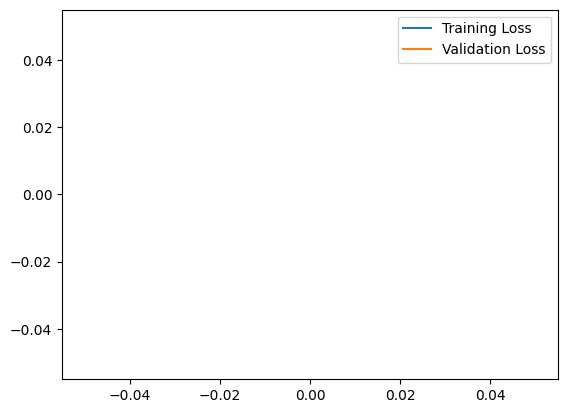

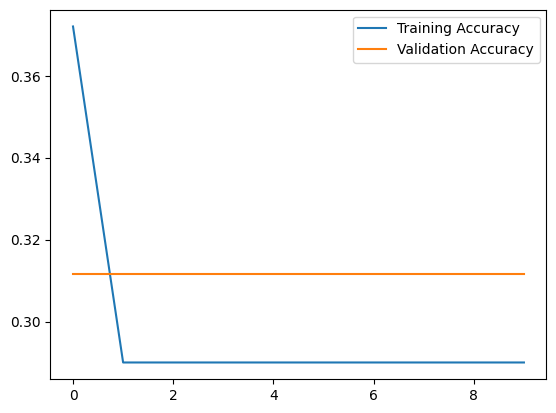

In [2]:
# Sequential: LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


# Load the data from the CSV file
data_dir = "/home/ihsannh17/Downloads/RMP/github-repos/etc/training-ai/training_2.csv"
data = pd.read_csv(data_dir)

# Preprocess the data
# Convert timestamp to a numeric value (assuming it's in Unix timestamp format)
data['Timestamp'] = pd.to_datetime(data['Timestamp']).astype(np.int64)

# Splitting data into features (timestamp and biomarker) and labels
X = data[['Timestamp', 'Biomarker']].values
y = data['Label'].values

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Define the sequence length
sequence_length = 10  # You can adjust this according to your data and sequence requirements

# Create sequences with corresponding labels
sequences = []
next_labels = []
for i in range(len(X_normalized) - sequence_length):
    sequences.append(X_normalized[i : i + sequence_length])
    next_labels.append(y[i + sequence_length - 1])

# Convert sequences and labels to numpy arrays
X_sequence = np.array(sequences)
y_sequence = np.array(next_labels)

# Reshape data for LSTM input (samples, timesteps, features)
X_sequence = X_sequence.reshape((X_sequence.shape[0], X_sequence.shape[1], X_sequence.shape[2]))
X_train, X_val, y_train, y_val = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_sequence.shape[1], X_sequence.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy}')

# Optionally, you can plot training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [4]:
# Normal
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
data_dir = "/home/ihsannh17/Downloads/RMP/github-repos/etc/training-ai/training_2.csv"
data = pd.read_csv(data_dir)

# Preprocess the data
# Convert timestamp to a numeric value (assuming it's in Unix timestamp format)
data['Timestamp'] = pd.to_datetime(data['Timestamp']).astype(np.int64)

# Splitting data into features (timestamp and biomarker) and labels
X = data[['Timestamp', 'Biomarker']].values
y = data['Label'].values

# Normalize features (timestamp and biomarker)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions on new data
# Replace new_data with the data you want to predict
new_data = np.array([[new_timestamp_1, new_biomarker_1], [new_timestamp_2, new_biomarker_2], ...])
scaled_new_data = scaler.transform(new_data)
predictions = model.predict(scaled_new_data)
print("Predictions:", predictions)


Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.4069 - val_loss: nan - val_accuracy: 0.3457
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.3457
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.3457
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.3457
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.3457
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.3457
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.3457
Epoch 8/10
23/23 [==============================] - 0s 3ms/ste

NameError: name 'new_timestamp_1' is not defined

In [2]:
# Training
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print a portion of the dataset
print("Sample of the Iris dataset:")
for i in range(5):
    print(f"Features: {X[i]}, Target: {y[i]}")

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a sequential model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy}")


Sample of the Iris dataset:
Features: [5.1 3.5 1.4 0.2], Target: 0
Features: [4.9 3.  1.4 0.2], Target: 0
Features: [4.7 3.2 1.3 0.2], Target: 0
Features: [4.6 3.1 1.5 0.2], Target: 0
Features: [5.  3.6 1.4 0.2], Target: 0


/home/ihsannh17/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1/1 [==============================] - 0s 174ms/step - loss: 0.1674 - accuracy: 0.9333

Test Accuracy: 0.9333333373069763
